<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">

# Deasafio 2
# Procesamiento de lenguaje natural
## Custom embedddings con Gensim



### Objetivo
El objetivo es utilizar documentos / corpus para crear embeddings de palabras basado en ese contexto. Se utilizará canciones de bandas para generar los embeddings, es decir, que los vectores tendrán la forma en función de como esa banda haya utilizado las palabras en sus canciones.

# Pasos realizados para obtner los libros en txt
1-Descargue los siguientes libros de https://www.textos.info/

2-Los converti a txt y los descargue,para ello use un cofigo en colab. El codigo para hacer esto lo obtube de chatgpt con el siguiente promp "Tengo archivo en pdf quiero pasarlo a achivo txt y quiero ejecutar en colab y descargar el txt"

3-coloque todos los arhivs en una carpeta y lo zipee, luego lo subi a mi repositorio.


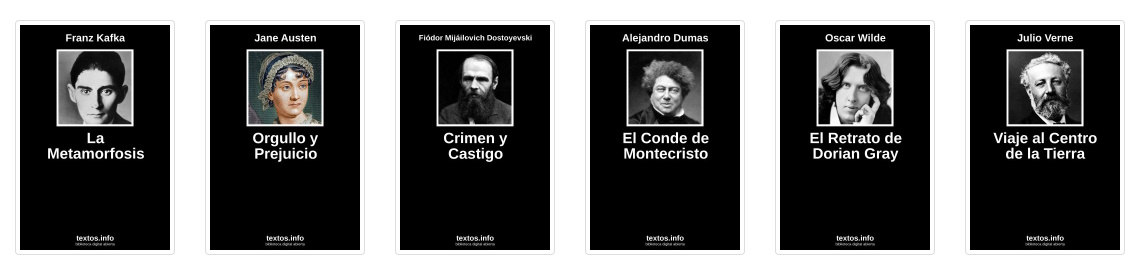



Ejecute los siguientes codigos por cada uan de las imagenes descargadas

In [ ]:
# Aqui voy a seleccionar el pdf de uno de los libro descargados
from google.colab import files

# Subir el archivo PDF
archivo_pdf = files.upload()

Saving Julio Verne - Viaje al Centro de la Tierra.pdf to Julio Verne - Viaje al Centro de la Tierra.pdf


In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import PyPDF2

# Función para convertir PDF a texto
def pdf_a_texto(ruta_pdf, ruta_txt):
    with open(ruta_pdf, 'rb') as archivo_pdf:
        lector_pdf = PyPDF2.PdfReader(archivo_pdf)
        texto_completo = ""

        # Extraer texto de cada página
        for pagina in range(len(lector_pdf.pages)):
            pagina_actual = lector_pdf.pages[pagina]
            texto_completo += pagina_actual.extract_text()

    # Guardar el texto extraído en un archivo .txt
    with open(ruta_txt, 'w', encoding='utf-8') as archivo_txt:
        archivo_txt.write(texto_completo)

In [ ]:
# Aqui coloco el nombre del pdf del libro y del txt'
#ruta_pdf = 'Franz Kafka - La Metamorfosis.pdf'
#ruta_txt = 'Franz Kafka - La Metamorfosis.txt'

#ruta_pdf = 'Jane Austen - Orgullo y Prejuicio.pdf'
#ruta_txt = 'Jane Austen - Orgullo y Prejuicio.txt'

#ruta_pdf = 'Fiodor Mijailovich Dostoyevski - Crimen y Castigo.pdf'
#ruta_txt = 'Fiodor Mijailovich Dostoyevski - Crimen y Castigo.txt'

#ruta_pdf = 'Alejandro Dumas - El Conde de Montecristo.pdf'
#ruta_txt = 'Alejandro Dumas - El Conde de Montecristo.txt'

#ruta_pdf = 'Oscar Wilde - El Retrato de Dorian Gray.pdf'
#ruta_txt = 'Oscar Wilde - El Retrato de Dorian Gray.txt'

ruta_pdf = 'Julio Verne - Viaje al Centro de la Tierra.pdf'
ruta_txt = 'Julio Verne - Viaje al Centro de la Tierra.txt'

In [ ]:
# Convertir el PDF a texto
pdf_a_texto(ruta_pdf, ruta_txt)

In [ ]:
# Descargar el archivo txt
from google.colab import files
files.download(ruta_txt)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Una vez descargada da una de la imagenes en txt. Las guarde en una carpeta,  comprimi la carpeta y la subi al repositorio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec

### Datos
Utilizaremos como dataset canciones de bandas de habla inglesa.

In [2]:
!apt-get install unzip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [24]:
# Descargar la carpeta de dataset
import os
import platform
if os.access('./librostxt', os.F_OK) is False:
    if os.access('librostxt.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://github.com/BarbaraKatherina/PLN/raw/main/librostxt.zip -o librostxt.zip
        else:
            !wget librostxt.zip https://github.com/BarbaraKatherina/PLN/raw/main/librostxt.zip

        !unzip -q librostxt.zip
else:
  print("El dataset ya se encuentra descargado")

--2024-09-08 20:24:39--  http://librostxt.zip/
Resolving librostxt.zip (librostxt.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘librostxt.zip’
--2024-09-08 20:24:39--  https://github.com/BarbaraKatherina/PLN/raw/main/librostxt.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BarbaraKatherina/PLN/main/librostxt.zip [following]
--2024-09-08 20:24:40--  https://raw.githubusercontent.com/BarbaraKatherina/PLN/main/librostxt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1977423 (1.9M) [application/zip]
Saving to: ‘librostxt.zip’

librostxt.zip       100%[===

In [26]:
os.listdir("./librostxt")


['Oscar Wilde - El Retrato de Dorian Gray.txt',
 'Jane Austen - Orgullo y Prejuicio.txt',
 'Fiodor Mijailovich Dostoyevski - Crimen y Castigo.txt',
 'Franz Kafka - La Metamorfosis.txt',
 'Alejandro Dumas - El Conde de Montecristo.txt',
 'Julio Verne - Viaje al Centro de la Tierra.txt']

In [22]:
os.remove("./librostxt.zip")

In [28]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs
df = pd.read_csv('librostxt/Alejandro Dumas - El Conde de Montecristo.txt', sep='/n', header=None)
df.head()

<ipython-input-28-f7805763e22a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('librostxt/Alejandro Dumas - El Conde de Montecristo.txt', sep='/n', header=None)


,0
0,1El Conde de Montecristo
1,Alejandro Dumas
2,textos.infoLibros gratis - biblioteca digital ...
3,2Texto núm. 562
4,Título: El Conde de Montecristo


# Desafio 2

1-Crear sus propios vectores con Gensim
basado en lo visto en clase con otro
dataset.

2-Probar términos de interés y explicar
similitudes en el espacio de embeddings.

3-Intentar plantear y probar tests de
analogías.

4-Graficar los embeddings
resultantes.

5-Sacar conclusiones.

In [29]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 43906


In [30]:
!pip install tensorflow


# 1-Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.

In [31]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (esto podría realizarse con NLTK o spaCy también)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [46]:
# Demos un vistazo
sentence_tokens[:20]

[['1el', 'conde', 'de', 'montecristo'],
 ['alejandro', 'dumas'],
 ['textos', 'infolibros', 'gratis', 'biblioteca', 'digital', 'abierta'],
 ['2texto', 'núm', '562'],
 ['título', 'el', 'conde', 'de', 'montecristo'],
 ['autor', 'alejandro', 'dumas'],
 ['etiquetas', 'novela'],
 ['editor', 'edu', 'robsy'],
 ['fecha', 'de', 'creación', '16', 'de', 'junio', 'de', '2016'],
 ['fecha', 'de', 'modificación', '16', 'de', 'junio', 'de', '2016'],
 ['edita', 'textos', 'info'],
 ['maison', 'carrée'],
 ['c', 'ramal', '48'],
 ['07730', 'alayor', 'menorca'],
 ['islas', 'baleares'],
 ['españa'],
 ['más', 'textos', 'disponibles', 'en', 'http', 'www', 'textos', 'info'],
 ['3primera', 'parte', 'el', 'castillo', 'de', 'if'],
 ['4capítulo', 'primero', 'marsella', 'la', 'llegada'],
 ['el',
  '24',
  'de',
  'febrero',
  'de',
  '1815',
  'el',
  'vigía',
  'de',
  'nuestra',
  'señora',
  'de',
  'la',
  'guarda',
  'dio',
  'la']]

### Crear los vectores (word2vec)

In [33]:
from gensim.models.callbacks import CallbackAny2Vec
# Durante el entrenamiento gensim por defecto no informa el "loss" en cada época
# Sobrecargamos el callback para poder tener esta información
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [34]:
# Crearmos el modelo generador de vectores
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=300,       # dimensionalidad de los vectores
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [35]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [36]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 43906


In [37]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 6730


### Entrenar embeddings

In [38]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=20,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 2854596.25
Loss after epoch 1: 1952617.75
Loss after epoch 2: 1847320.0
Loss after epoch 3: 1813121.0
Loss after epoch 4: 1726952.0
Loss after epoch 5: 1705428.0
Loss after epoch 6: 1683243.0
Loss after epoch 7: 1663341.0
Loss after epoch 8: 1638085.0
Loss after epoch 9: 1569390.0
Loss after epoch 10: 1550604.0
Loss after epoch 11: 1534812.0
Loss after epoch 12: 1519242.0
Loss after epoch 13: 1505620.0
Loss after epoch 14: 1491332.0
Loss after epoch 15: 1483000.0
Loss after epoch 16: 1473260.0
Loss after epoch 17: 1463340.0
Loss after epoch 18: 1459328.0
Loss after epoch 19: 1457526.0


(5585052, 8671920)

### 2-Probar términos de interés y explicar similitudes en el espacio de embeddings.

In [40]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["conde"], topn=10)

[('joannés', 0.5431886315345764),
 ('anfitrión', 0.5297794938087463),
 ('joyero', 0.5284125208854675),
 ('zaccone', 0.524097740650177),
 ('receptor', 0.5212737321853638),
 ('boville', 0.5157319903373718),
 ('banquero', 0.5153728127479553),
 ('sargento', 0.5135284662246704),
 ('mensajero', 0.511704683303833),
 ('blacas', 0.5102607607841492)]

In [42]:
# Palabras que MENOS se relacionan con...:
w2v_model.wv.most_similar(negative=["conde"], topn=10)

[('pesar', -0.02287931554019451),
 ('tiempo', -0.0474025122821331),
 ('porque', -0.0494566448032856),
 ('han', -0.055511604994535446),
 ('acaso', -0.05582326650619507),
 ('muerte', -0.05656274035573006),
 ('contra', -0.06169430539011955),
 ('tú', -0.06377796083688736),
 ('hará', -0.07157429307699203),
 ('posición', -0.0723804458975792)]

In [45]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["montecristo"], topn=10)

[('monte\xadcristo', 0.5082111954689026),
 ('morcef', 0.4771188497543335),
 ('andrés', 0.4716954827308655),
 ('joyero', 0.46262481808662415),
 ('alejaba', 0.45974862575531006),
 ('de\xadbray', 0.4579276144504547),
 ('facultativo', 0.45750680565834045),
 ('inglés', 0.4543779194355011),
 ('montecristo—', 0.45435407757759094),
 ('bertuccio', 0.44841268658638)]

In [48]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["marsella"], topn=5)

[('1814', 0.557773232460022),
 ('verlas', 0.55760657787323),
 ('trieste', 0.5534207820892334),
 ('chalons', 0.5524566769599915),
 ('rogliano', 0.5523726940155029)]

In [51]:
# Ensayar con una palabra que no está en el vocabulario:
try:
    similar_words = w2v_model.wv.most_similar(negative=["horse"])
    print(similar_words)
except KeyError as e:
    print(f"Error: La palabra '{e}' no se encuentra en el vocabulario del modelo.")

Error: La palabra '"Key 'horse' not present in vocabulary"' no se encuentra en el vocabulario del modelo.


In [55]:
# el método `get_vector` permite obtener los vectores:
vector_marsella = w2v_model.wv.get_vector("marsella")
print(vector_marsella)

[ 3.14292341e-01 -1.60297230e-01  3.91120650e-02 -8.63500834e-02
 -2.46544182e-01 -3.22284847e-01  1.99641645e-01  7.16257453e-01
 -2.21071560e-02 -3.62659991e-01  9.45645720e-02 -1.70715794e-01
  4.33280393e-02  1.07460633e-01 -1.06021926e-01 -9.76209417e-02
 -1.44579634e-01  2.41696626e-01 -7.80635281e-03 -4.53654021e-01
  3.54754291e-02  1.19285248e-01  1.41402811e-01  4.05081250e-02
 -1.89032346e-01 -1.23753779e-01 -3.22624296e-01  2.83838570e-01
 -1.57769889e-01 -2.58681655e-01 -1.68120176e-01  6.74979165e-02
  2.95769908e-02 -3.15172881e-01 -5.42485677e-02  2.92594638e-02
  1.16889000e-01 -3.09751295e-02  1.50118247e-01  6.80702366e-03
 -3.02736074e-01 -4.48703431e-02 -1.86366230e-01 -4.16099846e-01
  4.13042232e-02  7.56413192e-02  3.04852903e-01 -9.10316687e-03
 -2.84393072e-01  1.31891146e-01  2.79626995e-01 -2.03906268e-01
  1.51772991e-01 -1.32250972e-02 -3.34640220e-02 -1.05047628e-01
  3.61483321e-02 -9.18962955e-02  1.14258295e-02 -3.54408115e-01
 -1.58221826e-01 -6.61850

In [56]:
# el método `most_similar` también permite comparar a partir de vectores
w2v_model.wv.most_similar(vector_marsella)

[('marsella', 1.0),
 ('1814', 0.557773232460022),
 ('verlas', 0.5576066374778748),
 ('trieste', 0.5534207820892334),
 ('chalons', 0.5524567365646362),
 ('rogliano', 0.5523726940155029),
 ('córcega', 0.5514017939567566),
 ('posesión', 0.5506904721260071),
 ('auteuil', 0.5486357808113098),
 ('nimes', 0.5393552184104919)]

In [57]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["marsella"], topn=10)

[('1814', 0.557773232460022),
 ('verlas', 0.55760657787323),
 ('trieste', 0.5534207820892334),
 ('chalons', 0.5524566769599915),
 ('rogliano', 0.5523726940155029),
 ('córcega', 0.5514017939567566),
 ('posesión', 0.5506904721260071),
 ('auteuil', 0.548635721206665),
 ('nimes', 0.5393552184104919),
 ('asuntos', 0.5383807420730591)]

# 3-Intentar plantear y probar tests de analogías.

In [66]:
# Probar analogías con Word2Vec
try:
    result = w2v_model.wv.most_similar(positive=["conde", "mujer"], negative=["hombre"])
    print(result)
except KeyError as e:
    print(f"Error: La palabra '{e}' no se encuentra en el vocabulario del modelo.")


[('negativa', 0.45603373646736145), ('avrigny', 0.4431301951408386), ('respetuosamente', 0.4367668926715851), ('anfitrión', 0.4321962296962738), ('boville', 0.4284365177154541), ('joannés', 0.42841482162475586), ('dandré', 0.42839765548706055), ('platero', 0.426166296005249), ('—entrad', 0.41718754172325134), ('—madre', 0.41427040100097656)]


### Visualizar agrupación de vectores

In [58]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model, num_dimensions = 2 ):

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

# 4-Graficar los embeddings resultantes.

In [59]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show(renderer="colab") # esto para plotly en colab

In [67]:
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="colab") # esto para plotly en colab

In [60]:
# También se pueden guardar los vectores y labels como tsv para graficar en
# http://projector.tensorflow.org/


vectors = np.asarray(w2v_model.wv.vectors)
labels = list(w2v_model.wv.index_to_key)

np.savetxt("vectors.tsv", vectors, delimiter="\t")

with open("labels.tsv", "w") as fp:
    for item in labels:
        fp.write("%s\n" % item)

# 5-Sacar conclusiones.


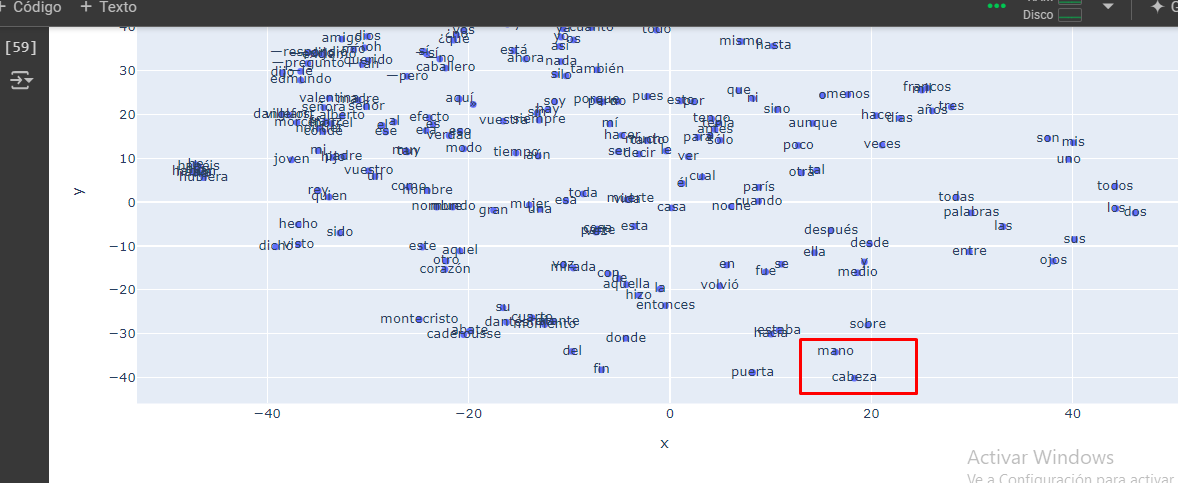



Al observar que palabras como "manos" y "cabeza" están en la misma zona del gráfico, podemos inferir que el modelo ha capturado correctamente las relaciones semánticas entre términos relacionados con partes del cuerpo. Esto sugiere que el modelo ha agrupado palabras con significados similares o que frecuentemente aparecen en contextos cercanos en el texto, como descripciones físicas o acciones relacionadas con el cuerpo.

Es decir, que el texto presenta suficientes co-ocurrencias de estos términos para que el modelo los agrupe en el espacio de embeddings de manera coherente.